<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/4-Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/4_Data_Wrangling_Avanzado/data_wrangling_avanzado.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Data Wrangling Avanzado


## Tabla de Contenidos

I. Data Wrangling Avanzado

    I. Tabla de Contenidos

II. Table of Contents

    I. Introducción
    II. Pandas y Cadenas de caracteres
        I. count
        II. Ejercicio
        III. contains
        IV. lower, upper y title
        V. split

III. ¿Cómo organizar la información? OLAP, OLTP y Tidy data

    I. OLTP y OLAP
    II. Tidy data
        I. Tuberculosis
            I. Tabla 1
            II. Tablas 2.a y 2.b
            III. Tabla 3
            IV. Tabla 4
            V. Tabla 5
    III. Melt
        I. Ejercicios
        II. Ejercicios

IV. Series de Tiempo

    I. Datetime y metodos de manipulacion de series de tiempo
    II. Ventanas y Medias moviles
    III. Shift y Diff

## Introducción

En esta clase vamos a ver cómo hacer manejo avanzado de datos a partir, tanto en cadenas de caracteres como en series de tiempo. El primer dataset que vamos a utilizar es del portal de datos abiertos de España.

In [ ]:
# !pip install seaborn
# !pip install numpy==1.18.5

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/parodesprov.csv')

In [ ]:
df.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0


Generalmente cuando en un dataset encontramos campos de texto es recomendable analizar si la carga se hizo con un buen criterio y no hay errores en la carga. Vamos a prestar atención a los campos Texto y PAD_1_COD_PROV.

In [ ]:
# sobre la columna de 'Texto'
df["Texto"].head()

0    Alegría-Dulantzi
1             Amurrio
2             Aramaio
3          Artziniega
4             Armiñón
Name: Texto, dtype: object

Noten que el primer valor incluye un "-" como separador


Vamos a comenzar eliminando las filas que tienen null el campo Texto, para facilitar el análisis posterior.

In [ ]:
# editamos el dataframe, eliminando valores nulos
df = df[~df["Texto"].isnull()]

## Pandas y Cadenas de caracteres

Cuando una pd.Series es de tipo object Pandas permite acceder a métodos para operar sobre strings llamando al método **.str**.

### count

El método **.str.count()** permite contar cuántas ocurrencias de un patrón hay en una Series. Para ello se puede pasar una regex. Las regex o expresiones regulares son una cadena de caracteres que define una búsqueda de un patrón. En esta clase no vamos a ahondar en regex pero sí podemos mencionar que:
- Si pasamos un carácter en particular nos va a matchear cuántas veces aparece.
- El carácter . funcion como comodín, con lo cual cualquier caracter va a matchear.

Entonces, si queremos saber cuántas veces aparece el símbolo "-" en cada término podemos hacer:

In [ ]:
df["Texto"].str.count("-").head()

0    1
1    0
2    0
3    0
4    0
Name: Texto, dtype: int64

Ahora, nos llama la atención que el símbolo "-" aparece en la primera fila, ¿será algo común?

In [ ]:
# hacemos un conteo de la ocurrencia del str '-'
df["Texto"].str.count("-").value_counts()

Texto
0    16009
1      222
2        4
Name: count, dtype: int64

### Ejercicio

1- Ver los casos que tiene 2 "-" en el nombre.

In [ ]:
# utilizamos una expresion booleana, cuando hay dos "-"
#de esa condicion, usamos corchetes para indexar y poder acceder a esas filas
df[df["Texto"].str.count("-") == 2]

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
4460,4461,28901,Lozoyuela-Navas-Sieteiglesias,28,13,82.0,1210.0,Madrid,13.0,9.022504e+07,41743.297851,28.0
4809,4810,31199,Oroz-Betelu/Orotz-Betelu,31,15,6.0,153.0,Navarra,15.0,4.376475e+07,30033.101103,31.0
12630,12631,28901,Lozoyuela-Navas-Sieteiglesias,28,13,82.0,1237.0,NaN,NaN,9.022504e+07,41743.297139,NaN
12979,12980,31199,Oroz-Betelu/Orotz-Betelu,31,15,6.0,149.0,NaN,NaN,4.376475e+07,30033.100830,NaN


2- Graficar un histograma con la cantidad de caracteres en la columna Texto usando contains. Tip: pueden usar el método .hist.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# cuento cantidad de caracteres de la columna texto
cant_caract = df.Texto.str.len()
cant_caract

0        16
1         7
2         7
3        10
4         7
         ..
16334     4
16335     8
16336    21
16337     5
16338     7
Name: Texto, Length: 16235, dtype: int64

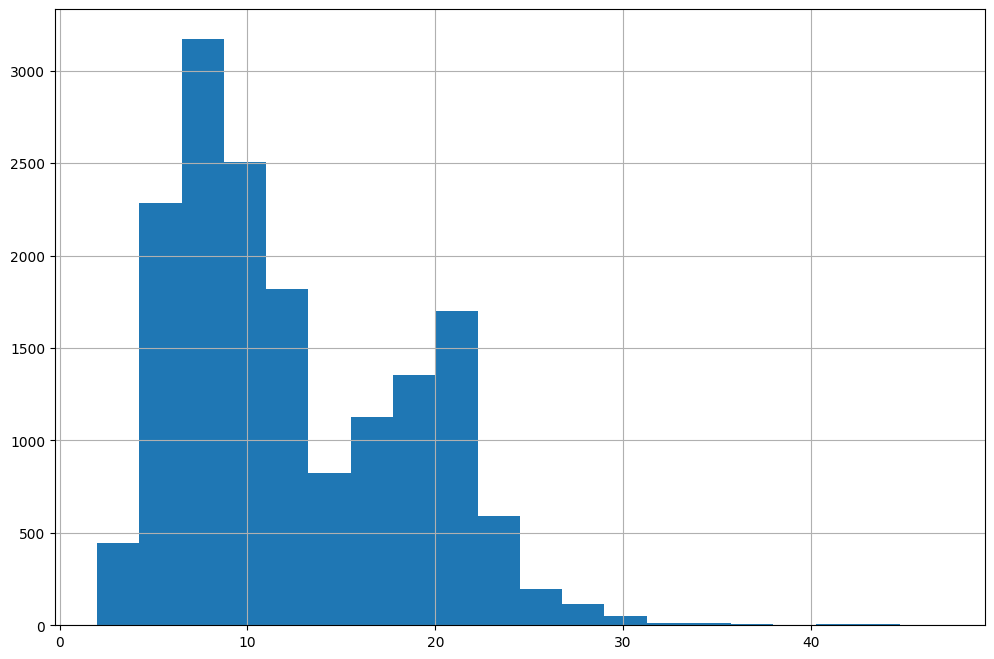

In [ ]:
cant_caract_hist = df.Texto.str.len().hist(bins=20, figsize=(12,8))

3- Mostrar que el resultado obtenido en el ejercicio anterior equivale a aplicar **.str.len()**. Para ello usen el método **pd.Series.equals()** y comparen el método usado en el ejercicio anterior con aplicar .str.len()

In [ ]:
# mostrar diferencias entre usar count() y len(). Utilizando pd.Series.equals()
serie1 = df.Texto.str.len() # cuenta caracteres
serie2 = df.Texto.str.count("") # cuenta espacios

serie1.equals(serie2)

False

In [ ]:
# la serie 2 incluye la contabilizacion de espacios, si le resto 1, no los contabiliza
serie2_bis = (df.Texto.str.count("") - 1)

serie1.equals(serie2_bis)

True

### contains

Digamos que queremos encontrar nombres de ciudades vascas. Para ello sabemos que "herri" en Euskera significa lugar, con lo que esperamos encontrar "erri" en una gran cantidad de ciudades. Vamos a filtrar trayendo solamente las ciudades que incluyen "erri" dentro de su nombre con el método **.str.contains**.

In [ ]:
df[df["Texto"].str.contains("erri",case=False)].head() # case es para considerar mayúsculas y minúsculas o no

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
33,34,1046,Erriberagoitia/Ribera Alta,1,16,26.0,745.0,Araba/Álava,16.0,2.227260e+08,114217.030007,1.0
34,35,1047,Ribera Baja/Erribera Beitia,1,16,72.0,1353.0,Araba/Álava,16.0,4.706702e+07,42082.113185,1.0
162,163,3025,Benferri,3,10,161.0,1920.0,Alicante/Alacant,10.0,2.002354e+07,21212.706211,3.0
2026,2027,13081,Terrinches,13,8,122.0,748.0,Ciudad Real,8.0,9.099513e+07,41739.202048,13.0
2506,2507,17056,Cornellà del Terri,17,9,55.0,2279.0,Girona,9.0,5.058085e+07,38058.585347,17.0


In [ ]:
# sin case, osea sacando minisculas
df[df["Texto"].str.contains("erri")].shape

(42, 12)

In [ ]:
df[df["Texto"].str.contains("erri",case=False)].shape

(48, 12)

### lower, upper y title

Supongamos que queremos estar seguros que las nombres están estandarizados... podemos elegir pasar todo a minúscula o a mayúscula de la siguiente manera:

In [ ]:
# pasar todo a minuscula (lower)
df["Texto"].str.lower().head()

0    alegría-dulantzi
1             amurrio
2             aramaio
3          artziniega
4             armiñón
Name: Texto, dtype: object

In [ ]:
# pasar todo a mayuscula (upper)
df["Texto"].str.upper().head()

0    ALEGRÍA-DULANTZI
1             AMURRIO
2             ARAMAIO
3          ARTZINIEGA
4             ARMIÑÓN
Name: Texto, dtype: object

También podemos aplicar mayúscula a la primera letra y al resto minúscula, con **.str.title**. Este método toma en consideración espacios o símbolos no alfabéticos. Es decir, va a comenzar con mayúscula los términos después de un espacio, "-" o "/". Por ejemplo

In [ ]:
df["Texto"][df["Texto"].str.count("-") == 2].str.title()

4460     Lozoyuela-Navas-Sieteiglesias
4809          Oroz-Betelu/Orotz-Betelu
12630    Lozoyuela-Navas-Sieteiglesias
12979         Oroz-Betelu/Orotz-Betelu
Name: Texto, dtype: object

### split

En el ejemplo anterior encontramos el uso de "/". En este caso se refiere a que el nombre de la ciudad (Oroz-Betelu/Orotz-Betelu) tiene dos nombres oficiales, uno en español y otro en vasco.

Supongamos que queremos estandarizar el problema y quedarnos sólo con el nombre que aparece primero, ¿cómo podemos hacerlo?

In [ ]:
df["Texto"][df["Texto"].str.count("/") > 0].unique()[:10]

array(['Ayala/Aiara', 'Baños de Ebro/Mañueta', 'Campezo/Kanpezu',
       'Elburgo/Burgelu', 'Elvillar/Bilar', 'Labastida/Bastida',
       'Lanciego/Lantziego', 'Laudio/Llodio',
       'Moreda de Álava/Moreda Araba', 'Erriberagoitia/Ribera Alta'],
      dtype=object)

Nota: en un primer momento uno podría pensar que en este dataset el primer elemento debería ser siempre el nombre en, por ejemplo, español y el segundo en vasco... Sin embargo, no es así :-S

Vamos a usar **.str.split()**, vale la pena mencionar que el método devuelve una lista con un elemento por cada separación que pudo realizar. Para ello recibe como parámetro un string que es un patrón que va a usar, justamente, para dividir la cadena de caracteres. Comúnmente sólo vamos a pasarle un elemento por el cual splitear.

In [ ]:
df["Texto"].str.split() # por default split separa por espacios en blanco

0               [Alegría-Dulantzi]
1                        [Amurrio]
2                        [Aramaio]
3                     [Artziniega]
4                        [Armiñón]
                   ...            
16334                       [Biel]
16335                   [Marracos]
16336    [Villamayor, de, Gállego]
16337                      [Ceuta]
16338                    [Melilla]
Name: Texto, Length: 16235, dtype: object

Noten en el ejemplo anterior que si devuelve una lista con un solo elemento es que no matcheó y, por lo tanto, no dividió el string.

Yendo a nuestro problema, separamos por el caracter '/'. Notar como se transforman los nombres compuestos
MUCHO CUIDADO! Nuestros strings ahora son listas!! :o

In [ ]:
df["Texto"].str.split("/").head()

0    [Alegría-Dulantzi]
1             [Amurrio]
2             [Aramaio]
3          [Artziniega]
4             [Armiñón]
Name: Texto, dtype: object

Entonces, nos quedamos con la primera versión del nombre al separar por "/"

In [ ]:
texto_para_split = df["Texto"][df["Texto"].str.count("/") > 0] # guardo en una variable casos con /

texto_para_split.str.split("/").apply(lambda x: x[0]) # para indexar las listas tengo que usar apply

7                   Ayala
8           Baños de Ebro
12                Campezo
16                Elburgo
18               Elvillar
               ...       
15372              Novelé
15412             Sagunto
15447          Vilallonga
15705    Karrantza Harana
15757              Urduña
Name: Texto, Length: 234, dtype: object

Basicamente se dividio en listas a las ciudades con '/'. Usando split. Despues se le aplico un apply para quedarse con el primer elemento.

Por otra parte, si quisiéramos guardar cada nombre en una columna separada podemos hacerlo usando la opción expand:

In [ ]:
# a cada str que ahora es una list, la expandimos en una columna a cada elemento separado
texto_para_split.str.split("/", expand=True)

,0,1
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar
...,...,...
15372,Novelé,Novetlè
15412,Sagunto,Sagunt
15447,Vilallonga,Villalonga
15705,Karrantza Harana,Valle de Carranza


Podemos asignar el resultado de expand de la siguiente manera:

In [ ]:
# agregacion de columnas
df[["nombre_1", "nombre_2"]] = df["Texto"].str.split("/", expand=True) # usamos el df original y expandimos

In [ ]:
# imprimir nuevas columnas
df[["nombre_1", "nombre_2"]].head() # vemos que hay nulls que nombre_2 porque tienen un solo nombre

,nombre_1,nombre_2
0,Alegría-Dulantzi,None
1,Amurrio,None
2,Aramaio,None
3,Artziniega,None
4,Armiñón,None


In [ ]:
df.loc[~df["nombre_2"].isnull(), ["nombre_1", "nombre_2"]]

,nombre_1,nombre_2
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar
...,...,...
15372,Novelé,Novetlè
15412,Sagunto,Sagunt
15447,Vilallonga,Villalonga
15705,Karrantza Harana,Valle de Carranza


In [ ]:
# indexamos con loc a las filas con valores no nulos con nombres en espaniol y catalan
df.loc[~df["nombre_2"].isnull(), ["nombre_1", "nombre_2"]].head() # noten el filtro booleano

,nombre_1,nombre_2
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar


## ¿Cómo organizar la información? OLAP, OLTP y Tidy data

Existen diversas formas de organizar la información. En general, qué vamos a hacer con la información es clave para entender cómo organizarla. Veamos algunos conceptos habituales a la hora de trabajar con datos.

### OLTP y OLAP

La sigla OLTP viene de Online transaction processing y se refiere a transacciones que ocurren en tiempo real. Un ejemplo típico son los ATMs (automated teller machine), más conocidos como "cajeros automáticos".

En este aspecto transacción tiene dos acepciones y ambas son válidas: por un lado, se procesan transacciones en término de bases de datos (que vamos a ver a continuación), por otro lado, se suele aplicar a transacciones económicas en donde se intercambian entidades económicas.

Sistemas OLTP son la mayoría de los sistemas tradicionales que conocemos, especialmente los sistemas bancarios. Estos son sistemas transaccionales (en la primera acepción de arriba) porque intentan cumplir 4 objetivos (**ACID**):

- Las transacciones son operaciones **atómicas**: se hacen por completo o no se hacen. Imagínense una transferencia bancaria, ésto requiere debitar en una cuenta y acreditar en otra. Si la operación no fuera atómica y fallara podríamos quedarnos en un estado inesperado en el cual se debite de la primera y no se acredite en la segunda. Para evitar ésto, la atomicidad garantiza que si la operación falla en alguna parte del proceso revertimos completamos la operación y no impactamos ningún cambio (hacemos *rollback*).

- Toda transacción debe mantener la **consistencia** de la base de datos, es decir, debe respetar una serie de restricciones. Por ejemplo, podemos pensar que para que una tarjeta de crédito sea de extensión de una cuenta esa cuenta debe existir previamente. Otro ejemplo, puede ser que no pueden existir dos cuentas bancarias diferentes con el mismo número.

- Además, los sistemas transaccionales (especialmente los sistemas OLTP) requieren garantizar el **aislamiento** de las operaciones. Es común que estos sistemas necesiten resolver miles de operaciones concurrentes (es decir, que suceden en simultáneo), el aislamiento consiste en que esas operaciones dejen en la base de datos el mismo estado que si las operaciones fueran secuenciales (es decir, una por vez). Incluso, si una de esas falla, no debería alterar el resultado.


Para ésto, se implementan diferentes algoritmos a fin de asegurar que no se generen errores ni competencias entre usuarios que estan intentando acceder a los mismos registros a la vez.

OLAP (Online Analytical Processing) por otra parte se refiere a todos los sistemas utilizados para analisis y reportes de negocios (Business Intelligence), en los cuales se realizan diferentes operaciones de agregacion sobre los datos, a fin de proveer a los usuarios con informacion relevante.

Las herramientas OLAP permiten realizar análisis multidimensionales, tomando en consideración distintas dimensiones y métricas. En este sentido, está lo que se conoce como "cubo OLAP". El cubo OLAP es un array multidimensional que permite analizar la información vista desde distintos ángulos. Por ejemplo, podemos querer ver un reporte financiero por producto, por ciudad, por tiempo, etc. Cada uno de estos términos es una dimensión del análisis.

Estos sistemas generalmente requieren procesos de carga y transformaciones masivas que pueden durar horas o días, y permiten presentan la información de un modo tal que el análisis es en tiempo real, no así la información que usa.

## Tidy data

**Tidy data** es un trabajo escrito por Hadley Wickham (de la empresa RStudio) que se ha difundido mucho, especialmente en la comunidad de R, sobre buenas prácticas a la hora de estructurar información tabular. Pueden consultar el trabajo acá: https://vita.had.co.nz/papers/tidy-data.pdf

La información tabular consta de **filas** y **columnas**. Las columnas siempre tienen una etiqueta y las filas sólo a veces.

Los *datasets* constan de **valores**, éstos pueden ser numéricos o no numéricos . En el caso en que sea un valor numérico representa una cantidad, si no es numérico es una cualidad. Además, los valores miden o caracterizan un determinado atributo (altura, peso, temperatura, etc.). Este atributo se conoce como **variable**. Por último, esa variable se corresponde con una determinada unidad observada. Generalmente llamamos a eso simplemente **observación** (por ejemplo, la persona a la que se le midió la altura).

Dicho ésto, Wickham define un dataset *tidy* u ordenado como aquel que cumple la tercera forma normal de bases de datos, pero con un lenguaje más cercano al campo del análisis de datos y pensando en información contenida en una tabla, y no en una base de datos con muchas tablas. Las condiciones son:

- Cada variable forma una columna.
- Cada observación forma una fila.
- Cada tipo de unidad observacional forma una tabla.

Además, describe 5 de los errores más comunes a la hora de ordenar la información:

- Los nombres de columna en vez de ser nombres de variables son valores
- Muchas variables se guardan en una sola columna.
- Las variables se guardan tanto en columnas como en filas.
- Distintos tipos de unidades observacionales se guardan en una misma tabla.
- Una única unidad observacional se almacena en distintas tablas.4

### Tuberculosis

A continuación vamos a ver un dataset de tuberculosis representado de distintas maneras...

#### Tabla 1

En esta primera representación de la información vemos que una misma columna (type) contiene dos variables (cases y population)

|country|year|type|count|
| --- | --- | --- | --- |
|Afghanistan|1999|cases|745|
|Afghanistan|1999|population|19987071|
|Afghanistan|2000|cases|2666|
|Afghanistan|2000|population|20595360|
|Brazil|1999|cases|37737|
|Brazil|1999|population|172006362|

#### Tablas 2.a y 2.b
En este caso separamos la tabla en dos tablas. Una donde vemosla población y otra donde vemos la cantidad de casos... ¿Cuál es el problema acá?

Si bien ésto puede parecer correcto noten que la unidad observacional en realidad es un país en un año determinado... Con lo cual, lo que estamos haciendo acá es tener la misma unidad observacional en dos tablas. Además, los valores de la variable year están como nombres de columnas...


|country|1999|2000|
| --- | --- | --- |
|Afghanistan|745|2666|
|Brazil|37737|80488|
|China|212258|213766|

|country|1999|2000|
| --- | --- | --- |
|Afghanistan|19987071|20595360|
|Brazil|172006362|174504898|
|China|1272915272|1280428583|

#### Tabla 3

En este caso, perdimos las variables cases y population y calculamos un ratio. Si bien ésto cumple con ser "ordenado" estamos perdiendo las variables originales.

|country|year|rate|
| --- | --- | --- |
|Afghanistan|1999|745/19987071|
|Afghanistan|2000|2666/20595360|
|Brazil|1999|37737/172006362|
|Brazil|2000|80488/174504898|
|China|1999|212258/1272915272|
|China|2000|213766/1280428583|

#### Tabla 4

En la tabla 4 vemos que la variable *year*, *cases* y *population* se juntaron, con lo cual los valores de *year* pasan a formar parte de los nombres de las columnas.

|country|cases_1999|cases_2000|population_1999|population_2000|
| --- | --- | --- | --- | --- |
|Afghanistan|745|19987071|2666|20595360|
|Brazil|37737|172006362|80488|174504898|
|China|212258|1272915272|213766|1280428583|

Cada variable forma una columna.
Cada observación forma una fila.
Cada tipo de unidad observacional forma una tabla.

#### Tabla 5

Finalmente, la tabla *tidy* es:

|country|year|cases|population|
| --- | --- | --- | --- |
|Afghanistan|1999|745|19987071|
|Afghanistan|2000|2666|20595360|
|Brazil|1999|37737|172006362|
|Brazil|2000|80488|174504898|
|China|1999|212258|1272915272|
|China|2000|213766|1280428583|

variables: country, year, cases, population
observacion: paises
valores: tipo de unidad de observacion

## Melt

Una de los métodos más útiles de Pandas para pasar de un formato *wide* o *ancho* como el de la tabla 4 a uno *largo* como el de la tabla 5 es **.melt**.

Para aplicar este método vamos a obtener un dataset de Billboard sobre las canciones mas escuchadas del 2000.

Vamos a agregar la opcion de encoding para solucionar un problema con los caracteres usados.

In [ ]:
import pandas as pd

In [ ]:
billboard = pd.read_csv(
    'https://raw.githubusercontent.com/hadley/tidy-data/master/data/billboard.csv',
    on_bad_lines='skip',
    encoding='latin1'
)

In [ ]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicios

1- Analicen el dataset, vean cuáles son las variables, qué es la observación. ¿Es necesario separarlo en dos tablas? Nota: lo que se está midiendo en las columnas x1st.week a x76th.week es la posición en el ranking de las 100 canciones más escuchadas en esa semana. Es decir, x1st.week es la posición en el ranking durante la primera semana que esa canción fue top 100.

**respuesta propia de tiago: considero que es un dataset muy ancho con variables que podrian gestionarse de otro modo**

2- ¿Por qué creen que hay tantas columnas con valores nulos?

**respuesta propia de tiago: porque no estuvo dentro del top 100**

3- ¿Cómo podríamos hacer este dataset más ordenado? (no miren la continuación de la notebook :-S)

respuesta propia de tiago: usando el metodo melt para dividir las variables (columnas) de las semanas

Veamos primero como luce el dataset

In [ ]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bill = billboard


In [ ]:
bill0 = pd.melt(
    bill,
    id_vars = ["year",	"artist.inverted",	"track",	"time",	"genre", "date.entered",	"date.peaked"],
)
bill0.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [ ]:
# modificamos los nombres de las nuevas columnas
bill0 = pd.melt(
    bill,
    id_vars = ["year",	"artist.inverted",	"track",	"time",	"genre", "date.entered",	"date.peaked"],
    var_name= "week",
    value_name= "ranking",
)
bill0.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


Lo que querríamos es poder mantener todas las columnas excepto las columnas que incluyen "week" en el nombre. Para poder tener un formato "tidy" u "ordenado" deberíamos tener, por un lado, una columna week que indique el número de la semana (y preferentemente que sea un entero), y por otro lado una columna ranking con el valor del ranking en esa semana.

Para lograr ésto, vamos a usar la función **.melt**. Esta función recibe el DataFrame y vamos a usar el parámetro id_vars para pasarle la lista de columnas que van a ser constantes, es decir, que no van a variar. Con las demás columnas .melt va a:

1- tomar los nombres de columnas no incluídas en id_vars y convertirlos en una columna

2- va a tomar los valores de esas columnas y convertirlos en una segunda columna.

In [ ]:
# usamos el metodo pd.melt.
# le pasamos un df y con id_vars = [lista] identificamos variables (columnas) que nos queremos quedar
pd.melt(
    billboard,
    id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"] # identificador de variables
).head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


Ahora, querríamos que variable se llame week y value se llame ranking, para eso hacemos...

In [ ]:
billboard_2 = pd.melt(billboard,
                      id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"],
                      var_name="week", # cambio de nombre de la variable a week
                      value_name="ranking") #  cambio de nombre del value a ranking

In [ ]:
billboard_2.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


### Ejercicios

1- Quédense sólo con la parte numérica de week sin usar regex, y conviertan a número los valores de la columna.

In [ ]:
# quedarse solo con el numero de 	x1st.week
# convertir a int
week_digits = billboard_2.week.str.replace(".week", "").str.replace("x", "").str.replace("st", "").str.replace("th", "").str.replace("nd", "").str.replace("rd", "")
week_digits.astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
24087    76
24088    76
24089    76
24090    76
24091    76
Name: week, Length: 24092, dtype: int64

In [ ]:
billboard_2["week"] = week_digits.astype(int)

In [ ]:
billboard_2.sample(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
8148,2000,"Wright, Chely",It Was,3:51,R&B,2000-03-04,2000-04-15,26,NaN
23301,2000,"Raye, Collin",Couldn't Last A Moment,3:40,Country,2000-03-18,2000-06-24,74,NaN
7675,2000,Barenaked Ladies,Pinch Me,3:46,Rock,2000-09-09,2000-11-25,25,NaN
2705,2000,Ideal,Whatever,3:48,R&B,2000-06-10,2000-08-19,9,54.0
7136,2000,"Jackson, Alan",Pop A Top,3:04,Country,1999-11-13,2000-01-22,23,NaN


2- Conviertan los valores de la columna ranking a entero. Tip: prueben usar pd.isna() para saber si un valor es nulo o no.

In [ ]:
# determinar si hay valores nulos
nan_ranking = pd.isnull(billboard_2["ranking"])
nan_ranking

0        False
1        False
2        False
3        False
4        False
         ...  
24087     True
24088     True
24089     True
24090     True
24091     True
Name: ranking, Length: 24092, dtype: bool

In [ ]:
billboard_2 = billboard_2[billboard_2.ranking.notnull()]
print(f"la dimension se achico a: {billboard_2.shape} producto de eliminar Nan")

la dimension se achico a: (5307, 9) producto de eliminar Nan


In [ ]:
# Conviertan los valores de la columna ranking a entero.
billboard_2["ranking"] = billboard_2.ranking.astype(int)
billboard_2

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57
...,...,...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63,45
19700,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,63,50
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64,50
20017,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,64,50


3- Vean cuántas filas totales hay y eliminen las filas con nulos, ahora vuelvan a ver cuántas filas quedan.

In [ ]:
nan_ranking.shape

(24092,)

In [ ]:
billboard_2.shape

(5307, 9)

## Series de Tiempo

Las series de tiempo representan uno de los problemas mas interesantes en la ciencia de datos ya que refiere a eventos continuos y ordenados los cuales pueden ser independientes o tener alguna correlacion entre si. En este modulo veremos los metodos mas utilizados para manipular series de tiempo en pandas

### Datetime y metodos de manipulacion de series de tiempo

Para esta seccion vamos a utilizar el dataset de consumo energetico de Alemania.

In [ ]:
df_energia = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

Primeramente vamos a evaluar el dataset

In [ ]:
df_energia.columns = ['Fecha', 'Consumo', 'Eolica', 'Solar', 'Suma']
df_energia.tail(10)

,Fecha,Consumo,Eolica,Solar,Suma
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Las columnas son las siguientes:
    - Date — La fecha (yyyy-mm-dd)
    - Consumo — Electricidad Consumida en GWh
    - Eolica — Produccion de energia eolica en GWh
    - Solar — Produccion de energia solar en GWh
    - Suma — Suma de las dos anteriores GWh

Antes de comenzar a explorar el dataset, veamos algunas funciones de pandas para crear fechas. El metodo to_datetime nos permite transformar un string en cierto formato a un objeto del tipo Timestamp, el cual consiste de una fecha y una hora. Podemos ver que acepta varios formatos

In [ ]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [ ]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

Vamos a convertir el dtype de nuestra columna Fecha de object a  datetime64

In [ ]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    4383 non-null   object 
 1   Consumo  4383 non-null   float64
 2   Eolica   2920 non-null   float64
 3   Solar    2188 non-null   float64
 4   Suma     2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
# aplicamos pandas to datetime para convertir la columna fecha del df en una variable temporal
df_energia["Fecha"] = pd.to_datetime(df_energia["Fecha"])

In [ ]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    4383 non-null   datetime64[ns]
 1   Consumo  4383 non-null   float64       
 2   Eolica   2920 non-null   float64       
 3   Solar    2188 non-null   float64       
 4   Suma     2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


Convertir la columna *Fecha* en datetime nos permite filtrar usando la información temporal...

In [ ]:
df_energia.head()

,Fecha,Consumo,Eolica,Solar,Suma
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Podemos traernos los casos posteriores a 2009, por default a partir del 1ero de enero...

In [ ]:
df_energia[df_energia["Fecha"] > "2009"].head()

,Fecha,Consumo,Eolica,Solar,Suma
1097,2009-01-02,1161.911,NaN,NaN,NaN
1098,2009-01-03,1178.078,NaN,NaN,NaN
1099,2009-01-04,1130.021,NaN,NaN,NaN
1100,2009-01-05,1333.041,NaN,NaN,NaN
1101,2009-01-06,1340.896,NaN,NaN,NaN


Con el método **.between** podemos filtrar por un rango de fechas...

In [ ]:
df_energia[df_energia["Fecha"].between("2008", "2010")].head()

,Fecha,Consumo,Eolica,Solar,Suma
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


En vez de filtrar usando años podemos pasar la fecha completa (siempre tengan presente el formato de la fecha)...

In [ ]:
df_energia[df_energia["Fecha"].between("2008-01-01", "2010-01-22")].head()

,Fecha,Consumo,Eolica,Solar,Suma
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


Y como si fuera poco también podemos filtrar sólo usando el año y el mes, sin especificar el día...

In [ ]:
df_energia[df_energia["Fecha"].between("2008-01", "2010-02")].head()

,Fecha,Consumo,Eolica,Solar,Suma
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


In [ ]:
df_energia[df_energia["Fecha"].between("2008-01", "2010-02")].tail()

,Fecha,Consumo,Eolica,Solar,Suma
1488,2010-01-28,1585.269,306.149,NaN,NaN
1489,2010-01-29,1493.020,145.473,NaN,NaN
1490,2010-01-30,1322.933,189.627,NaN,NaN
1491,2010-01-31,1203.635,174.109,NaN,NaN
1492,2010-02-01,1536.453,151.409,NaN,NaN


Ahora, vamos a convertir nuestra columna Fecha en un índice temporal... Esto va a crear un nuevo tipo de objeto llamado DatetimeIndex

In [ ]:
df_energia = df_energia.set_index("Fecha")

In [ ]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma
Fecha,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
df_energia.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=4383, freq=None)

Primeramente vamos a agregar columnas que nos proporcionen mas informacion sobre las fechas

In [ ]:
df_energia['Anio'] = df_energia.index.year
df_energia['Mes'] = df_energia.index.month
df_energia['Dia'] = df_energia.index.day_name()
df_energia.sample(5, random_state=0)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Como creamos el indice por las fechas, podemos localizar cualquier dia que querramos ahora

In [ ]:
df_energia.loc['2015-10-4']

Consumo    1096.609
Eolica       54.976
Solar         71.88
Suma        126.856
Anio           2015
Mes              10
Dia          Sunday
Name: 2015-10-04 00:00:00, dtype: object

In [ ]:
df_energia.loc['2017-08-10']

Consumo    1351.491
Eolica      100.274
Solar         71.16
Suma        171.434
Anio           2017
Mes               8
Dia        Thursday
Name: 2017-08-10 00:00:00, dtype: object

Incluso podemos buscar rangos de fechas

In [ ]:
df_energia.loc['2014-01-20':'2014-01-22']

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


O buscar por algun mes en particular

In [ ]:
df_energia.loc['2016-05']

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2016-05-01,1078.602,179.870,147.931,327.801,2016,5,Sunday
2016-05-02,1405.185,81.868,197.183,279.051,2016,5,Monday
2016-05-03,1462.935,208.678,139.151,347.829,2016,5,Tuesday
2016-05-04,1430.136,84.961,174.185,259.146,2016,5,Wednesday
2016-05-05,1111.379,150.624,212.713,363.337,2016,5,Thursday
2016-05-06,1254.051,255.574,217.569,473.143,2016,5,Friday
2016-05-07,1149.938,315.362,215.963,531.325,2016,5,Saturday
2016-05-08,1072.653,390.557,217.819,608.376,2016,5,Sunday
2016-05-09,1403.845,360.421,207.427,567.848,2016,5,Monday


Ahora veamos como se ve nuestra data de consumo de energia

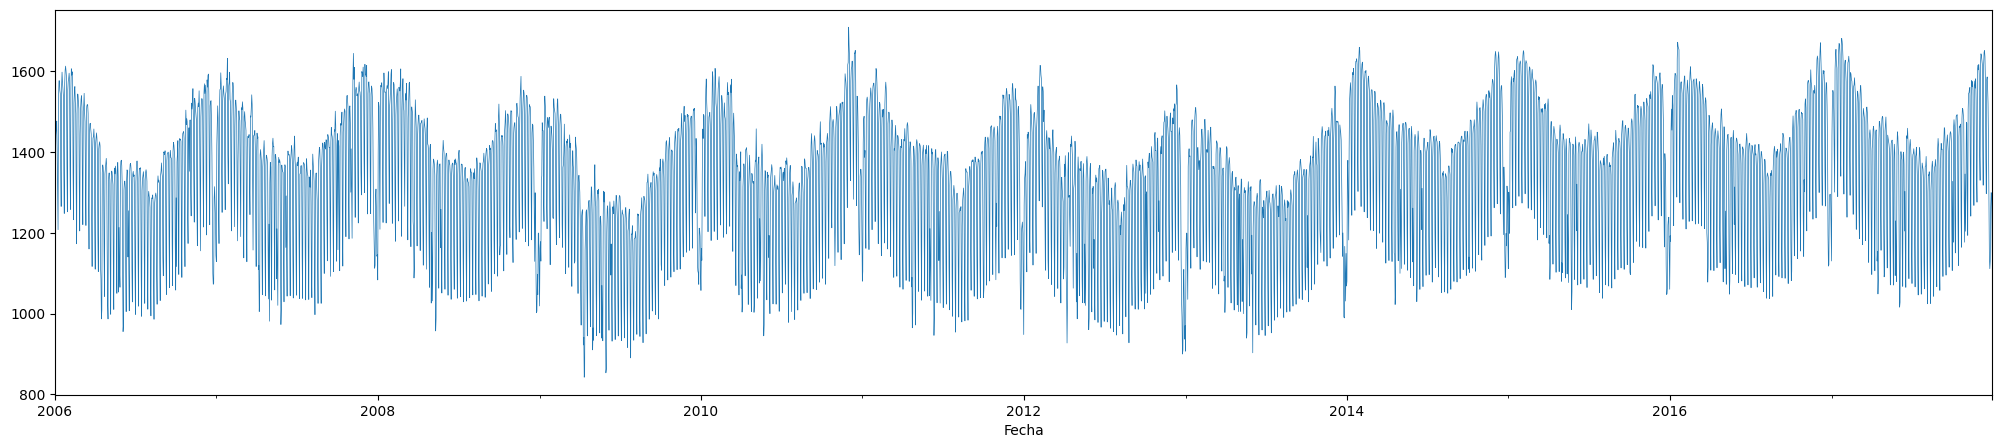

In [ ]:
#! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
df_energia['Consumo'].plot(linewidth=0.5, figsize=(25, 5));

## Ventanas y Medias moviles

Las ventanas moviles se refiere a aplicar alguna operacion de agregacion, por ejemplo el promedio sobre un conjunto de datos ordenados a la vez, por ejemplo el promedio de los ultimos 6 dias sobre cada conjunto ordenado de 6 dias en el dataset. Veamos un ejemplo para entenderlo mejor

**la media movil es el promedio de los valores de los ultimos x periodos**

In [ ]:
# promedio del consumo de 6 dias
opsd_7d = df_energia["Consumo"].rolling(6).mean()
opsd_7d.head(10)

Fecha
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
2006-01-06    1371.668833
2006-01-07    1410.186000
2006-01-08    1381.430000
2006-01-09    1395.895000
2006-01-10    1415.844000
Name: Consumo, dtype: float64

Podemos observar como las primeras 5 mediciones son Nan, ya que utiliza los primeros 5 valores para calcular a partir del 6to dia la media. El valor en el 7mo dia va a ser calculado con los datos del 2do al 6to dia, y asi sucesivamente.

<Axes: xlabel='Fecha'>

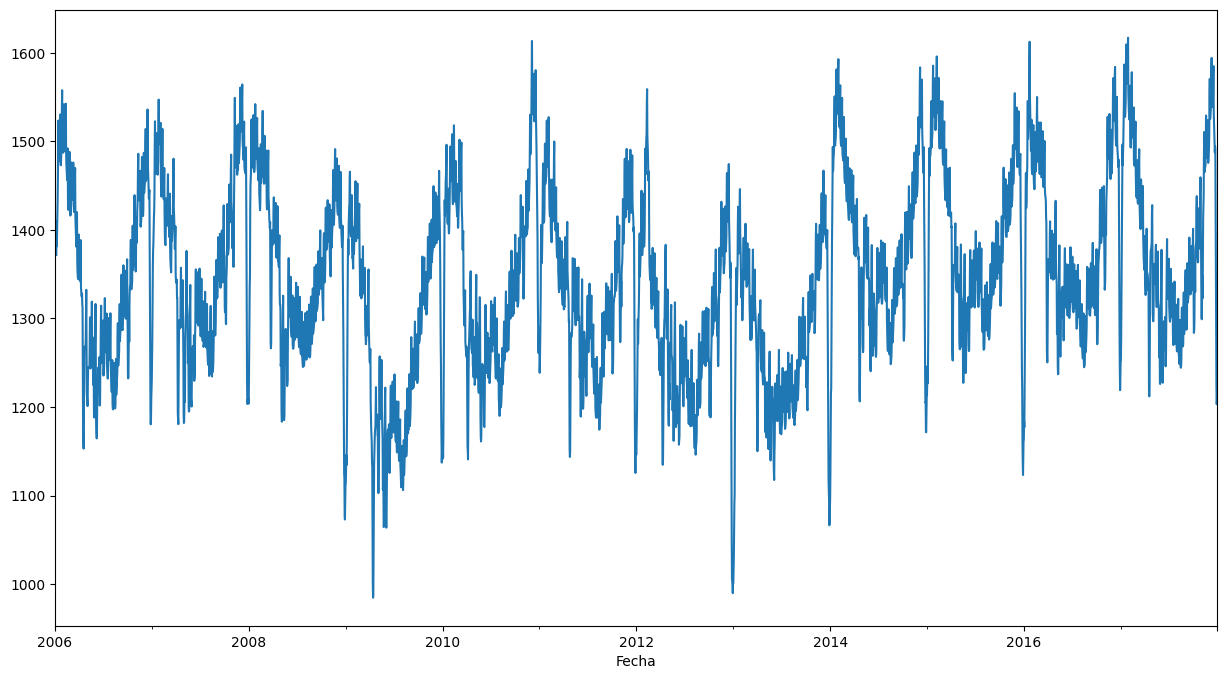

In [ ]:
opsd_7d.plot(figsize=(15, 8))

Este tipo de metodos son particularmente utiles en analisis financiero.

## Shift y Diff

La operacion de Shift, como su nombre lo dice traducido al castellano, desplazar los datos una cantidad N de periodos. Veamoslo con el ejemplo del consumo, suponiendo que quiero crear otra columna con el consumo total del periodo anterior para poder compararlo con el actual

In [ ]:
df_energia['ConsumoAyer'] = df_energia['Consumo'].shift(periods=1)


Veamos como quedo ahora el dataset

In [ ]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia,ConsumoAyer
Fecha,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,1520.37206
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,1423.23782
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,1272.17085
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,1141.75730
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,1111.28338
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,1130.11683
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,1263.94091
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,1299.86398
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,1295.08753


Podemos observar como la columna 'ConsumoAyer' es el valor de la columna 'Suma' exactamente del periodo anterior. Esto se puede realizar con tantos periodos como uno desee, pero hay que tener cuidado porque al inicio de nuestro dataset van a quedar valores Nan por la cantidad de periodos que elijamos. Hay que evaluar con que valor completamos esos valores.

Por ultimo supongamos que deseamos hacer la diferencia fila a fila del valor de ayer con el valor de hoy para el consumo total. Aqui nos conviene utilizar el metodo diff.

In [ ]:
# nueva columna llamada diferencia que muestra la diferencia con el periodo inmediatamente anterior
df_energia['Diferencia'] = df_energia['Consumo'].diff(1)

In [ ]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia,ConsumoAyer,Diferencia
Fecha,,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,1520.37206,-97.13424
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,1423.23782,-151.06697
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,1272.17085,-130.41355
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,1141.75730,-30.47392
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,1111.28338,18.83345
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,1130.11683,133.82408
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,1263.94091,35.92307
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,1299.86398,-4.77645
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,1295.08753,-79.63856
